In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import Normalizer
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:
!pip3 install uci-dataset
from sklearn import datasets
import uci_dataset as dataset
!git clone https://github.com/tanmay-pro/sampleData.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'sampleData'...
remote: Enumerating objects: 11648, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 11648 (delta 5), reused 21 (delta 4), pack-reused 11626
Receiving objects: 100% (11648/11648), 171.48 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (11644/11644), done.


In [ ]:
def k_one_per_class(trainX,trainY):
  loo = LeaveOneOut()
  loo.get_n_splits(trainX)
  unique_class = np.unique(trainY)
  k_for_each_class = {}
  for i in unique_class:
    k_for_each_class[i] = [0 for i in range(2,10)]
  for train_index, test_index in loo.split(trainX):
    trainData, testData = trainX[train_index], trainX[test_index]
    trainLabel, testLabel = trainY[train_index], trainY[test_index]
    for k in range(2, 10):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabel)
        predicted = model.predict(testData)
        if predicted == testLabel:
          k_for_each_class[testLabel[0]][k-2] += 1
        
  k_assigned_for_each_class = {}
  for i in unique_class:
    k_assigned_for_each_class[i] = np.argmax(k_for_each_class[i])+2
  return k_assigned_for_each_class

def localKNNoneperclass(trainX, testX, trainY, testY):
  k_assigned_for_each_class = k_one_per_class(trainX,trainY)
  predicted = []
  predictedKFrequency = [0]*10
  for key in k_assigned_for_each_class:
    predictedKFrequency[k_assigned_for_each_class[key]] += 1
  for i in range(0, len(testX)):
    distances = []
    for j in range(0, len(trainX)):
        distances.append(np.linalg.norm(testX[i] - trainX[j]))
    distances = np.array(distances)
    indices = np.argsort(distances)
    percent_of_classification_as_class = {}
    for x in k_assigned_for_each_class:
      k = k_assigned_for_each_class[x]
      nebrIndices = indices[0:k]
      nebrLabels = trainY[nebrIndices]
      percent_of_classification_as_class[x] = np.count_nonzero(nebrLabels == x)/k
    predicted.append(max(percent_of_classification_as_class, key=percent_of_classification_as_class.get))
  return predicted, metrics.accuracy_score(testY, predicted), predictedKFrequency

In [ ]:
#one per class
def k_one_per_class(trainX,trainY):
  unique_k =set()
  loo = LeaveOneOut()
  loo.get_n_splits(trainX)
  unique_class = np.unique(trainY)
  k_for_each_class = {}
  for i in unique_class:
    k_for_each_class[i] = [0 for i in range(2,10)]
  for train_index, test_index in loo.split(trainX):
    trainData, testData = trainX[train_index], trainX[test_index]
    trainLabel, testLabel = trainY[train_index], trainY[test_index]
    for k in range(2, 10):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabel)
        predicted = model.predict(testData)
        if predicted == testLabel:
          k_for_each_class[testLabel[0]][k-2] += 1
        
  k_assigned_for_each_class = {}
  for i in unique_class:
    k_assigned_for_each_class[i] = np.argmax(k_for_each_class[i])+2
  return k_assigned_for_each_class

def localKNNoneperclass(trainX, testX, trainY, testY):
  unique_k =set()
  k_assigned_for_each_class = k_one_per_class(trainX,trainY)
  predicted = []
  predictedKFrequency = [0]*10
  for key in k_assigned_for_each_class:
    predictedKFrequency[k_assigned_for_each_class[key]] += 1
  for i in range(0, len(testX)):
    distances = []
    for j in range(0, len(trainX)):
        distances.append(np.linalg.norm(testX[i] - trainX[j]))
    distances = np.array(distances)
    indices = np.argsort(distances)
    percent_of_classification_as_class = {}
    for x in k_assigned_for_each_class:
      k = k_assigned_for_each_class[x]
      unique_k.add(k)
      nebrIndices = indices[0:k]
      nebrLabels = trainY[nebrIndices]
      percent_of_classification_as_class[x] = np.count_nonzero(nebrLabels == x)/k
    predicted.append(max(percent_of_classification_as_class, key=percent_of_classification_as_class.get))
  return predicted, metrics.accuracy_score(testY, predicted), predictedKFrequency,statistics.mean(unique_k) 

The corresponding accuracy is 0.7387387387387387


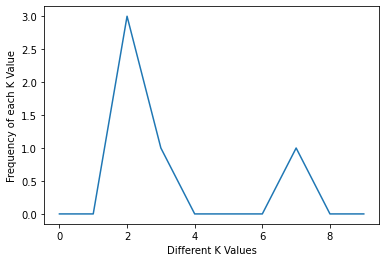

In [ ]:
seedsFile = '/content/sampleData/modifiedDatasets/seeds.csv'
df = pd.read_csv(seedsFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

predicted, accuracyScore, predictedKFrequency,meank = localKNNoneperclass(normalized_x_train, normalized_x_test, trainY, testY)
print("The corresponding accuracy is", accuracyScore)
print("The mean unique k  is", meank)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

The corresponding accuracy is 0.525


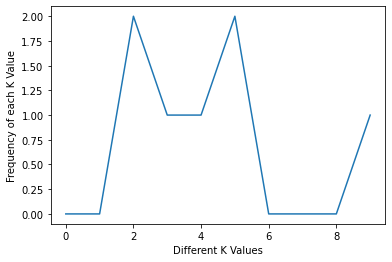

In [ ]:
transfusionFile = '/content/sampleData/modifiedDatasets/transfusion.csv'
df = pd.read_csv(transfusionFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

predicted, accuracyScore, predictedKFrequency,meank = localKNNoneperclass(normalized_x_train, normalized_x_test, trainY, testY)
print("The corresponding accuracy is", accuracyScore)
print("The mean unique k  is", meank)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

The corresponding accuracy is 0.6176470588235294


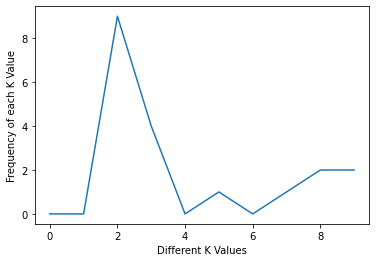

In [ ]:
soybeanFile = '/content/sampleData/modifiedDatasets/soybeans.csv'
df = pd.read_csv(soybeanFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

predicted, accuracyScore, predictedKFrequency,meank = localKNNoneperclass(normalized_x_train, normalized_x_test, trainY, testY)
print("The corresponding accuracy is", accuracyScore)
print("The mean unique k  is", meank)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

The corresponding accuracy is 0.829535864978903


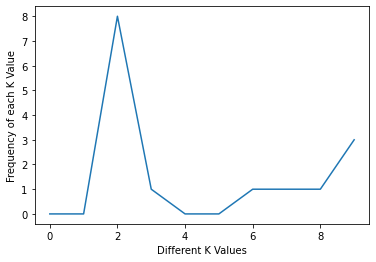

In [ ]:
immunoFile = '/content/sampleData/modifiedDatasets/Immuno.csv'
df = pd.read_csv(immunoFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

predicted, accuracyScore, predictedKFrequency,meank = localKNNoneperclass(normalized_x_train, normalized_x_test, trainY, testY)
print("The corresponding accuracy is", accuracyScore)
print("The mean unique k  is", meank)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()